In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from math import floor
from scipy import *

In [128]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
#mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
import os
os.environ['PINT_ARRAY_PROTOCOL_FALLBACK'] = "0"
import pint
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Q_([])

In [4]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

lineal0 = lambda x,a : a*x
lineal = lambda x,a,b : a*x+b

ureg = pint.UnitRegistry()

In [165]:
L1 = 12.3 # cm
L2 = 12.7 # cm
b = 3.0 # cm
a = 5.1 # cm
err_L = 0.1 # cm
N = 11
s = 0.5 # cm
n = N/s # 1/cm
err_n = 0.05 # 1/cm

In [181]:
def B(I,z):
    I=np.conj(np.conj(I))
    mu0 = 4*np.pi*1e-1
    R = a
    d = b/2
    n1 = n2 = n
    B1=0.5*I*n1*mu0*((L1 - z)/np.sqrt((z - L1)**2 + R**2) + z/np.sqrt((z)**2 + R**2))  
    B2=0.5*I*n2*mu0*((L1 + L2 + d - z)/np.sqrt((z - L1 - L2 - d)**2 + R**2) - (L1 + d - z)/np.sqrt((z - L1 - d)**2 + R**2))
    return B1 + B2

B_1 = B(data1.I.dropna()/1000,0)
B_2 = B(data2.I.dropna()/1000,0)

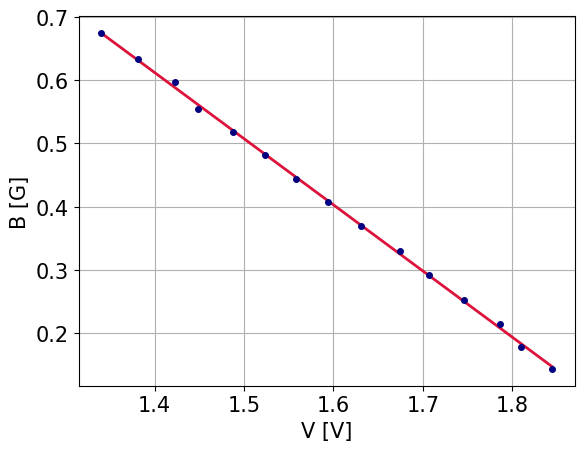

[-1.04694929  2.07792428]


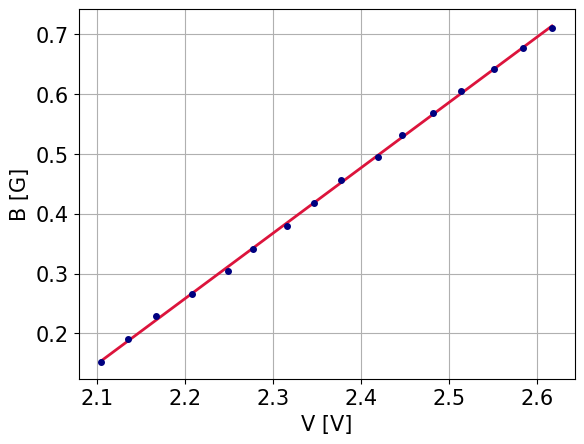

[ 1.09191318 -2.14394832]


In [182]:
pars1,cov1 = cf(lineal,data1.V.dropna(),B_1)
x_adj1 = np.linspace(min(data1.V.dropna()),max(data1.V.dropna()))
y_adj1 = lineal(x_adj1,*pars1)
plt.plot(x_adj1,y_adj1,'crimson',zorder=1)
plt.scatter(data1.V.dropna(),B_1,c='navy',zorder=2)
plt.grid()
plt.xlabel('V [V]')
plt.ylabel('B [G]')
plt.show()
print(pars1)

pars2,cov2 = cf(lineal,data2.V.dropna()[:-1],B_2[:-1])
x_adj2 = np.linspace(min(data2.V[:-1].dropna()),max(data2.V.dropna()[:-1]))
y_adj2 = lineal(x_adj2,*pars2)
plt.plot(x_adj2,y_adj2,'crimson',zorder=1)
plt.scatter(data2.V.dropna()[:-1],B_2[:-1],c='navy',zorder=2)
plt.grid()
plt.xlabel('V [V]')
plt.ylabel('B [G]')
plt.show()
print(pars2)

In [183]:
print(lineal(2.04697,*pars2)) # norte
err_N = 0.008196
print(lineal(1.87998,*pars2)) # sur

0.09116521196763916
-0.0911733703825055
